In [25]:
%matplotlib inline
import fair
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
from fair.constants.general import ppm_gtc

## Load the data

First run [run_ensemble](./run_ensemble.ipynb) to generate the `ensemble.nc`
data file.

This analysis takes output from running 1000 member ensemble which is not so large that it takes ages to run.  

In [2]:
Cpi = 284.32
data_stand = xr.load_dataset('../fair_ensemble_406314.nc')
# The numbers in the filename relate to Spice runid
data_stand

<xarray.Dataset>
Dimensions:          (ensemble_member: 1000, time: 141)
Coordinates:
  * ensemble_member  (ensemble_member) int64 0 1 2 3 4 5 ... 995 996 997 998 999
  * time             (time) int64 0 1 2 3 4 5 6 ... 134 135 136 137 138 139 140
    r0               (ensemble_member) float64 34.24 32.17 37.65 ... 33.9 37.95
    rc               (ensemble_member) float64 0.04698 0.02986 ... 0.01838
    rt               (ensemble_member) float64 4.099 0.4684 ... 2.83 2.267
    F2x              (ensemble_member) float64 4.127 3.66 3.678 ... 3.737 3.717
    tcr              (ensemble_member) float64 2.757 1.203 1.384 ... 2.842 1.912
    ecs              (ensemble_member) float64 3.57 1.688 2.843 ... 4.144 4.671
    other_rf         (ensemble_member) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
    C                (time) float64 284.3 287.2 290.0 ... 1.134e+03 1.145e+03
Data variables:
    temperature      (ensemble_member, time) float64 0.01993 0.04438 ... 4.737
    forcing          (ensemble_member, time) float64 0.1338 0.1931 ... 7.591
    emissions        (ensemble_member, time) float64 13.45 19.51 ... 33.12 33.34

In [3]:
data_bgc = xr.load_dataset('../fair_ensemble_425977.nc')
data_bgc

<xarray.Dataset>
Dimensions:          (ensemble_member: 1000, time: 141)
Coordinates:
  * ensemble_member  (ensemble_member) int64 0 1 2 3 4 5 ... 995 996 997 998 999
  * time             (time) int64 0 1 2 3 4 5 6 ... 134 135 136 137 138 139 140
    r0               (ensemble_member) float64 34.24 32.17 37.65 ... 33.9 37.95
    rc               (ensemble_member) float64 0.04698 0.02986 ... 0.01838
    rt               (ensemble_member) float64 4.099 0.4684 ... 2.83 2.267
    F2x              (ensemble_member) float64 4.127 3.66 3.678 ... 3.737 3.717
    tcr              (ensemble_member) float64 2.757 1.203 1.384 ... 2.842 1.912
    ecs              (ensemble_member) float64 3.57 1.688 2.843 ... 4.144 4.671
    C                (time) float64 284.3 287.2 290.0 ... 1.134e+03 1.145e+03
    other_rf         (ensemble_member, time) float64 -0.0 -0.05925 ... -7.471
Data variables:
    temperature      (ensemble_member, time) float64 0.01993 0.03556 ... 0.09625
    forcing          (ensemble_member, time) float64 0.1338 0.1338 ... 0.1206
    emissions        (ensemble_member, time) float64 13.45 19.51 ... 36.56 36.8

## Calculate basic statistical properties

As both the input and output data is stored in the netcdf file we can explore
both the parameter space and the response space.

Plot the input ECS and TCR used in forcing the model:

Text(0, 0.5, 'ECS')

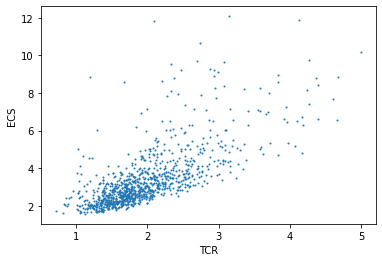

In [4]:
# plot scatter plot of the input pairs of ECS and TCR
fig, ax = plt.subplots()
ax.scatter(data_stand.tcr, data_stand.ecs, marker='o', s=(72./fig.dpi)**2)
ax.set_xlabel('TCR')
ax.set_ylabel('ECS')

Plot the ensemble mean emissions curve and ensemble standard deviation:

In [5]:
# add a temporary year coordinate

data_stand.coords["year"] = data_stand.time + 1850
data_stand = data_stand.swap_dims({"time": "year"})

data_bgc.coords["year"] = data_bgc.time + 1850
data_bgc = data_bgc.swap_dims({"time": "year"})


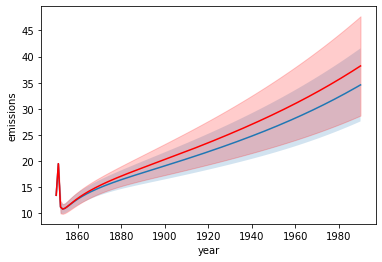

In [43]:
# plot the ensemble mean with +/- 1 std.dev. as a filled region
ens_stand_mean = data_stand.emissions.mean('ensemble_member')
ens_stand_std = data_stand.emissions.std('ensemble_member')

fig, ax = plt.subplots()

ax.fill_between(data_stand.year, ens_stand_mean - ens_stand_std, ens_stand_mean + ens_stand_std, alpha=0.2)
ens_stand_mean.plot(ax=ax)

ens_bgc_mean = data_bgc.emissions.mean('ensemble_member')
ens_bgc_std = data_bgc.emissions.std('ensemble_member')

ax.fill_between(data_bgc.year, ens_bgc_mean - ens_bgc_std, ens_bgc_mean + ens_bgc_std, alpha=0.2, color= 'red')
ens_bgc_mean.plot(ax=ax, color= 'red')


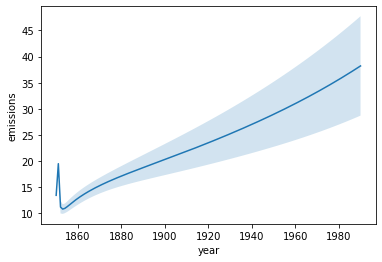

In [8]:
# plot the ensemble mean with +/- 1 std.dev. as a filled region
ens_bgc_mean = data_bgc.emissions.mean('ensemble_member')
ens_bgc_std = data_bgc.emissions.std('ensemble_member')

fig, ax = plt.subplots()

ax.fill_between(data_bgc.year, ens_bgc_mean - ens_bgc_std, ens_bgc_mean + ens_bgc_std, alpha=0.2)
ens_bgc_mean.plot(ax=ax)

Text(0.5, 1.0, 'All ensemble members temperature trajectory')

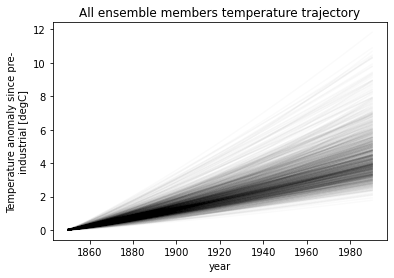

In [11]:
# plot all the temperature trajectory for all ensemble members
# overlaid with low opacity to demostrate distribution density

# WARNING: Do not do this for very large ensembles! rendering is very slow

fig, ax = plt.subplots()

for member in data_stand.ensemble_member:
    d = data_stand.temperature.sel(ensemble_member=member)
    d.plot(ax=ax, color='black', alpha=0.02)

ax.set_title("All ensemble members temperature trajectory")

Text(0.5, 1.0, 'All ensemble members temperature trajectory')

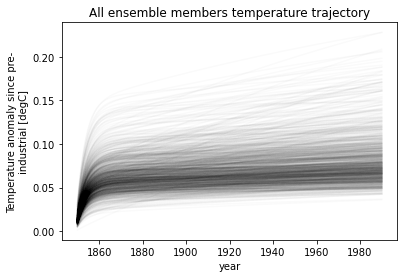

In [12]:
# plot all the temperature trajectory for all ensemble members
# overlaid with low opacity to demostrate distribution density

# WARNING: Do not do this for very large ensembles! rendering is very slow

fig, ax = plt.subplots()

for member in data_bgc.ensemble_member:
    d = data_bgc.temperature.sel(ensemble_member=member)
    d.plot(ax=ax, color='black', alpha=0.02)

ax.set_title("All ensemble members temperature trajectory")

array([1.18062415, 1.41375745, 1.82078738, 2.53026195, 3.14300271])

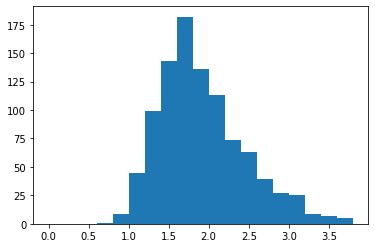

In [14]:
plt.hist(data_stand.tcr, bins=np.arange(0,4,0.2));
np.percentile(data_stand.tcr, [5, 16, 50, 84, 95])

array([1.88866156, 2.16763029, 2.94171934, 4.42914365, 6.60683879])

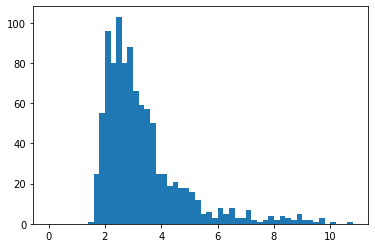

In [15]:
plt.hist(data_stand.ecs, bins=np.arange(0,11,0.2));
np.percentile(data_stand.ecs, [5, 16, 50, 84, 95])

Text(0.5, 1.0, 'Forcing')

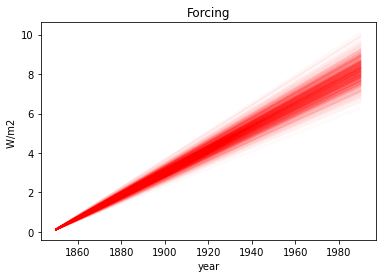

In [17]:
fig, ax = plt.subplots()

for member in data_stand.ensemble_member:
    d = data_stand.forcing.sel(ensemble_member=member)
    d.plot(ax=ax, color='red', alpha=0.02)
    
plt.xlabel('year')
plt.ylabel('W/m2 ')
plt.title('Forcing')

Text(0.5, 1.0, 'Forcing')

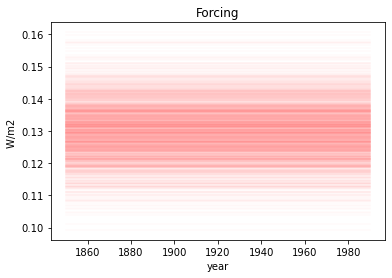

In [18]:
fig, ax = plt.subplots()

for member in data_bgc.ensemble_member:
    d = data_bgc.forcing.sel(ensemble_member=member)
    d.plot(ax=ax, color='red', alpha=0.02)
    
plt.xlabel('year')
plt.ylabel('W/m2 ')
plt.title('Forcing')

Text(0.5, 1.0, 'Forcing')

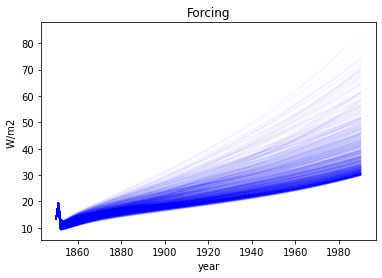

In [19]:
#Diagnosed emissions
fig, ax = plt.subplots()

for member in data_bgc.ensemble_member:
    d = data_bgc.emissions.sel(ensemble_member=member)
    d.plot(ax=ax, color='blue', alpha=0.02)
    
plt.xlabel('year')
plt.ylabel('W/m2 ')
plt.title('Forcing')


Text(0.5, 1.0, 'Forcing')

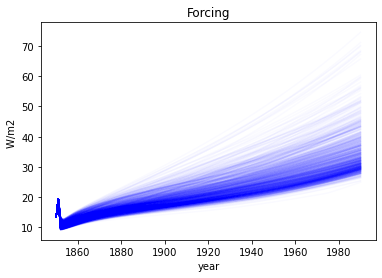

In [21]:
fig, ax = plt.subplots()

for member in data_stand.ensemble_member:
    d = data_stand.emissions.sel(ensemble_member=member)
    d.plot(ax=ax, color='blue', alpha=0.02)
    
plt.xlabel('year')
plt.ylabel('W/m2 ')
plt.title('Forcing')

(1000, 141)


Text(0.5, 1.0, 'Alpha')

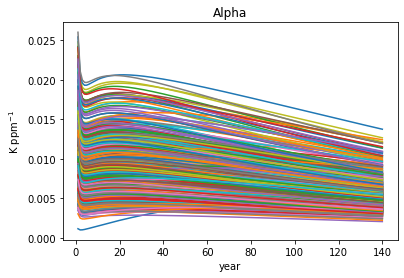

In [24]:
alpha = data_stand.temperature/(data_stand.C- Cpi)
print(alpha.shape)
plt.plot (data_stand.time, alpha.T)
plt.xlabel('year')
plt.ylabel('K ppm$^{-1}$')
plt.title('Alpha')



(1000, 141) (1000, 141) (141,)
(1000, 141)


Text(0.5, 1.0, 'Beta')

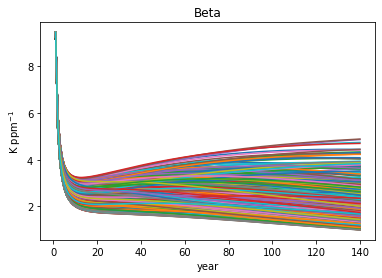

In [34]:
print(data_stand.emissions.shape, data_bgc.emissions.shape,data_stand.C.shape)

Cacc = np.cumsum(data_stand.emissions, axis=1 )-(data_stand.C-Cpi)*ppm_gtc
Cacc_bgc = np.cumsum(data_bgc.emissions, axis=1)-(data_stand.C-Cpi)*ppm_gtc

beta = Cacc_bgc/(data_stand.C-Cpi)
print (beta.shape)
plt.plot (data_stand.time, beta.T)
plt.xlabel('year')
plt.ylabel('K ppm$^{-1}$')
plt.title('Beta')


(1000, 141)
(1000, 141)


Text(0.5, 1.0, 'Gamma')

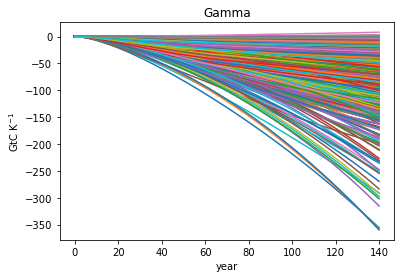

In [41]:
print(data_stand.temperature.shape)
gamma = (Cacc - Cacc_bgc)/ data_stand.temperature.T
print(gamma.shape)
plt.plot(data_stand.time, gamma.T)
plt.xlabel('year')
plt.ylabel('GtC K$^{-1}$')
plt.title('Gamma')